## Distribution Analysis
The goal of this analysis is a more nuanced look at the voxel values in an ROI rather than reducing the data to a mean. So, we do a visualization of the distribution of voxels in an ROI before and after anesthesia.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import ants
import os 
import glob
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
# set constants
data_dir = Path('../data_refine')
roi_dir = '../rois'

In [3]:
def plot_histograms(roi_matrix, nvoxels, roi_name, local_dir):
    
    output_dir = os.path.join('distributions', roi_name)
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    for model in local_dir.glob("*"): # e.g. GQI
        for scalar in model.glob("*"): # e.g. fa0
            bl_vox = np.zeros(nvoxels) # preallocate matrix size
            hex_vox = np.zeros(nvoxels)
            for subj in scalar.glob("sub-*"): # loop through subjects
                phases = list(subj.glob('baseline')) + list(subj.glob('hex')) # only need these folders
                for phase in phases:
                    if phase.name=='baseline':
                        bl_maps = list(phase.glob('*acq-glymph*.nii.gz'))
                        for smap in bl_maps:
                            smap = os.path.join(str(smap.parent.resolve()), smap.name)
                            scalar_map = ants.image_read(smap, 3)
                            if len(roi_matrix) > 0:
                                bl_flat = scalar_map.numpy().flatten()[roi_matrix] # single map's data
                                bl_vox = np.append(bl_vox, bl_flat, axis=0)
                    elif phase.name=='hex':
                        hex_maps = list(phase.glob('*acq-glymph*.nii.gz'))
                        for smap in hex_maps:
                            smap = os.path.join(str(smap.parent.resolve()), smap.name)
                            scalar_map = ants.image_read(smap, 3)
                            if len(roi_matrix) > 0:
                                hex_flat = scalar_map.numpy().flatten()[roi_matrix] # single map's data
                                hex_vox = np.append(hex_vox, hex_flat, axis=0)
                    else:
                        print('ERROR')

            bl_vox = bl_vox[bl_vox != 0]
            hex_vox = hex_vox[hex_vox != 0]

            # Do plotting on scalar-level
            ax = sns.histplot(bl_vox, color='blue', label='baseline')
            ax = sns.histplot(hex_vox, color='red', label='sleep')
            ax.set_xlabel(scalar.name)
            plt.legend()
            plt.title("Distribution of {} values in {}: baseline vs sleep".format(scalar.name, roi_name))
            plt.savefig('distributions/{}/{}_{}_{}_histo.png'.format(roi_name, model.name, scalar.name, roi_name))
            plt.show()
            plt.cla()


In [4]:
acc_img = ants.image_read('../rois/acc_res_mask.nii.gz')
w = acc_img.flatten().nonzero()[0]

caudate_img = ants.image_read('../rois/caudate_res_mask.nii.gz')
w2 = caudate_img.flatten().nonzero()[0]

gm_img = ants.image_read('../rois/gm_mask.nii.gz')
w3 = gm_img.flatten().nonzero()[0]

wm_img = ants.image_read('../rois/wm_mask.nii.gz')
w4 = wm_img.flatten().nonzero()[0]

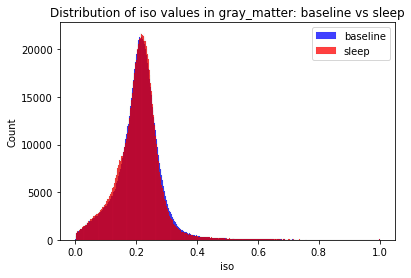

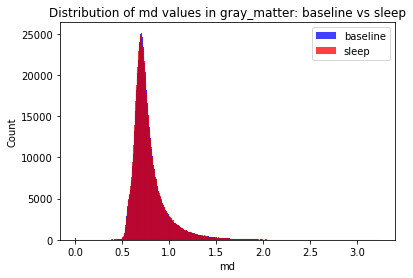

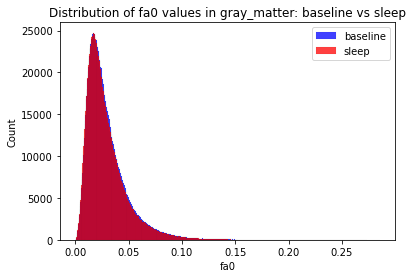

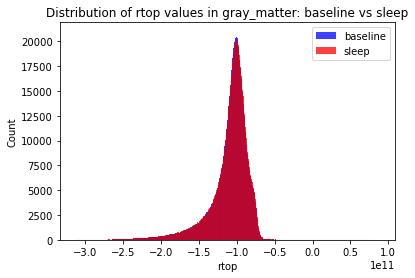

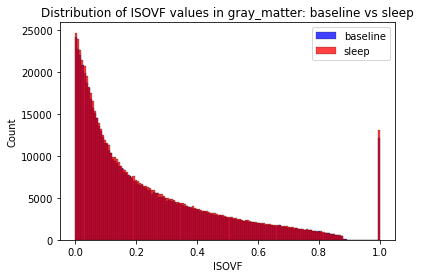

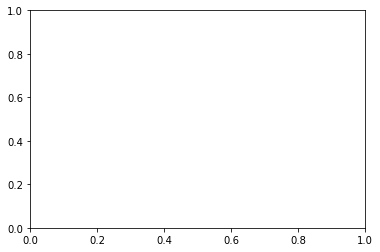

In [5]:
plot_histograms(w3, len(w3), 'gray_matter', data_dir)

### Plot distributions from just the first baseline scan and last anesthetized scan

In [6]:
def plot_histograms_2(roi_matrix, nvoxels, roi_name, local_dir):
    
    output_dir = os.path.join('distributions', roi_name)
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    for model in local_dir.glob("*"): # e.g. GQI
        for scalar in model.glob("*"): # e.g. fa0
            bl_vox = np.zeros(nvoxels) # preallocate matrix size
            hex_vox = np.zeros(nvoxels)
            for subj in scalar.glob("sub-*"): # loop through subjects
                phases = list(subj.glob('baseline')) + list(subj.glob('hex')) # only need these folders
                for phase in phases:
                    if phase.name=='baseline':
                        bl_maps = list(phase.glob('*acq-glymph*.nii.gz'))
                        bl_maps_str = sorted([os.path.join(str(smap.parent.resolve()), smap.name) for smap in bl_maps])
                        submap = bl_maps_str[0] # get the very first baseline condition map
                        submap_img = ants.image_read(submap, 3)
                        if len(roi_matrix) > 0:
                            bl_flat = submap_img.numpy().flatten()[roi_matrix] # single map's data
                            bl_vox = np.append(bl_vox, bl_flat, axis=0)

                    elif phase.name=='hex':
                        hex_maps = list(phase.glob('*acq-glymph*.nii.gz'))
                        hex_maps_str = sorted([os.path.join(str(smap.parent.resolve()), smap.name) for smap in hex_maps])
                        submap = hex_maps_str[-1] # get the very last anesthesia condition map
                        submap_img = ants.image_read(submap, 3)
                        if len(roi_matrix) > 0:
                            hex_flat = submap_img.numpy().flatten()[roi_matrix] # single map's data
                            hex_vox = np.append(hex_vox, hex_flat, axis=0)

                    else:
                        print('ERROR')

            bl_vox = bl_vox[bl_vox != 0]
            hex_vox = hex_vox[hex_vox != 0]

            # Do plotting on scalar-level
            ax = sns.histplot(bl_vox, color='blue', label='baseline')
            ax = sns.histplot(hex_vox, color='red', label='sleep')
            ax.set_xlabel(scalar.name)
            plt.legend()
            plt.title("Distribution of {} values in {}: baseline vs sleep".format(scalar.name, roi_name))
            plt.savefig('distributions/{}/{}_{}_{}_histo.png'.format(roi_name, model.name, scalar.name, roi_name))
            plt.show()
            plt.cla()

            print("full HEX, {}: {}".format(scalar.name, len(hex_vox)))

        

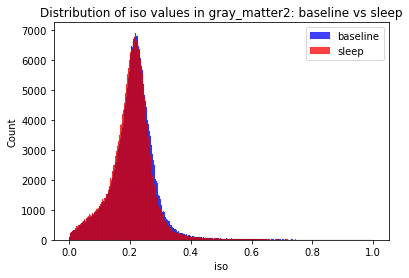

full HEX, iso: 432410


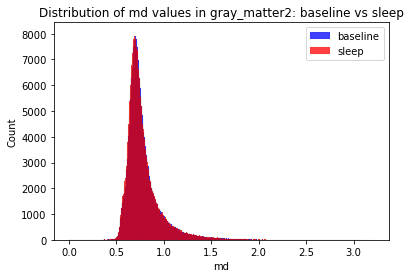

full HEX, md: 432375


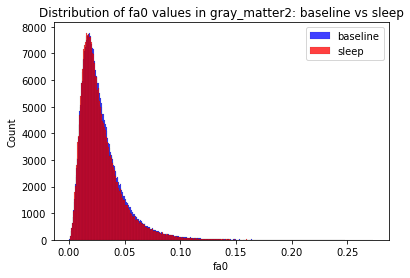

full HEX, fa0: 432410


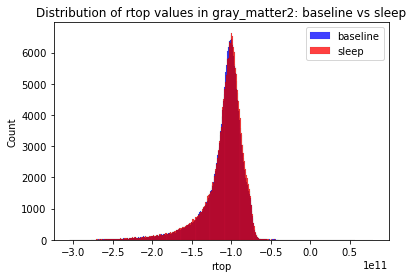

full HEX, rtop: 366061


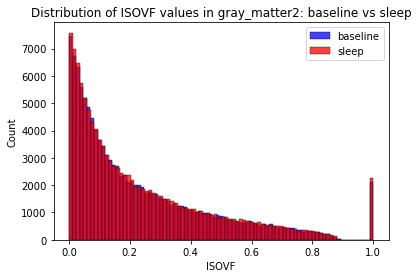

full HEX, ISOVF: 123258


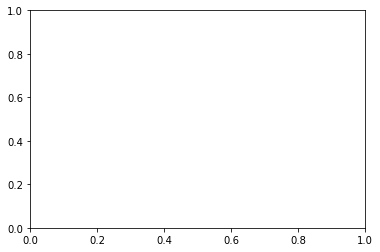

In [7]:
plot_histograms_2(w3, len(w3), 'gray_matter2', data_dir)